<a href="https://colab.research.google.com/github/Henry7001/Proyecto-PSW-P1/blob/main/nube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install Colorama
%pip install pygdrive3
%pip install BeautifulSoup4
%pip install requests
%pip install pandas
%pip install WordCloud


In [5]:
from bs4 import BeautifulSoup
import string
import requests
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
import numpy as np
from os import path
from colorama import init, Fore
from google.colab import output, files, auth
from pygdrive3 import service
from googleapiclient.discovery import build
import io
from googleapiclient.http import MediaIoBaseDownload

In [6]:
 
# def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
#  from google.colab import auth
#  auth.authenticate_user()

#  from googleapiclient.discovery import build
#  drive_service = build('drive', 'v3')
#  return 
#drive_service = google_authenticate()


Bienvenido a la aplicación
Proyecto de Proceso de Software 3-1
Estudiantes: 
- Henry Ruiz 
- Sergio Torres 
- Ronaldo Aguirre
Metodología usada: Orientado a Reutilización
Crear nubes de palabras con las etiquetas de un usuario de Stack Overflow en español
Profesor: Miguel Botto-Tobar, MSc.
Ingrese el id de usuario a generar Nube de Palabras: 7123
Etiquetas del usuario: 
{'python': 2000, 'git': 61, 'condiciones': 34, 'bash': 25, 'python-3.x': 689, 'punteros': 55, 'bucles': 33, 'script': 24, 'c': 254, 'python-2.7': 54, 'unicode': 32, 'jupyter': 23, 'lista': 132, 'diccionarios': 51, 'bucle-for': 31, 'latex': 23, 'pandas': 118, 'numpy': 47, 'matplotlib': 30, 'java': 22, 'funciones': 108, 'django': 43, 'matrices': 30, 'html': 19, 'lenguaje-agnóstico': 102, 'tkinter': 42, 'beautifulsoup': 30, 'opencv': 19, 'regex': 98, 'python-3.7': 42, 'variables': 29, 'optimización': 19, 'c++': 90, 'promesas': 42, 'yield': 29, 'while': 19, 'javascript': 90, 'ordenamiento': 40, 'codificación': 28, 'python-r

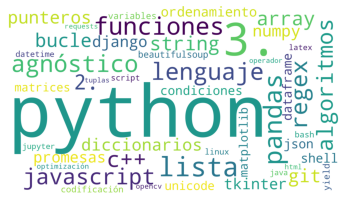

In [ ]:
#def read_file(file_id):
#  Download file from Google Drive 
#  Argument: file_id
#  Returns: downloaded file
  
#  file_id = file_id

#  import io
#  from googleapiclient.http import MediaIoBaseDownload

#  request = drive_service.files().get_media(fileId=file_id)
#  downloaded = io.BytesIO()
#  downloader = MediaIoBaseDownload(downloaded, request)
#  done = False
#  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
#    _, done = downloader.next_chunk()

#  downloaded.seek(0)
#  return downloaded

def extracción(id,etiq):
    linkdet = 'https://es.stackoverflow.com/users/'+id+'/?tab=tags'
    consulta = requests.get(linkdet)
    extraer = BeautifulSoup(consulta.content, 'html.parser')
    while consulta.status_code!=200:
        print("No se encontró al usuario con ese ID")
        idr=input("Ingrese el id de usuario a extraer informacion: ")
        linkdet = 'https://es.stackoverflow.com/users/' + idr + '/?tab=tags'
        consulta = requests.get(linkdet)
        extraer = BeautifulSoup(consulta.content, 'html.parser')

    Tags = extraer.find_all('a', class_='post-tag')
    Points = extraer.find_all('div', class_='answer-votes')
    etiquetas = list()

    for i in Tags:
        etiquetas.append(i.text)

    puntos = list()

    for i in Points:
        puntos.append(i.text.replace('k','000'))

    for i in range(len(etiquetas)-1):
      if int(puntos[i])>0:
        etiq[etiquetas[i]] = int(puntos[i])

def loop(n, p):
    y = 0
    while y < n:
        y = y + 1
        tex.write("\t"+p)

def nube(etiq):
    x = 0
    for x in etiq:
      if etiq[x]>0:
        n=etiq[x]
        p = x
        loop(n, p)
    tex.close()
    with open("etiquetas.txt", encoding='utf-8')as file: 
      text = file.read()
      normal_word = r"(?:\w[\w']+)"
      ascii_art = r"(?:\w[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
      c= r"(?:\w[{punctuation}]+)".format(punctuation=string.punctuation)
      emoji = r"(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
      regexp = r"{normal_word}|{ascii_art}|{emoji}|{c}".format( normal_word = normal_word,ascii_art=ascii_art,emoji=emoji,c=c)
      #mask = read_file('1GhkcuKKS2X24HjsbG0zK7TneF3GpXGnT')
      cloud = WordCloud(background_color="white", contour_color='black', contour_width=10, collocations=False,regexp=regexp).generate(text)
      plt.imshow(cloud)
      plt.axis('off') 
      plt.show()

def start():
    id = input("Ingrese el id de usuario a generar Nube de Palabras: ")
    etiq = {}
    extracción(id,etiq)
    print("Etiquetas del usuario: ")
    print(etiq)
    if etiq: 
        nube(etiq)
    else:
        print("El usuario tiene 0 puntos o no tiene etiqueta, motivo por el cual no se pudo generar la nube.")

while True:
    output.clear()
    tex = open("etiquetas.txt", "w")
    print("Bienvenido a la aplicación")
    print("Proyecto de Proceso de Software 3-1")
    print("Estudiantes: \n- Henry Ruiz \n- Sergio Torres \n- Ronaldo Aguirre")
    print("Metodología usada: Orientado a Reutilización")
    print("Crear nubes de palabras con las etiquetas de un usuario de Stack Overflow en español")
    print("Profesor: Miguel Botto-Tobar, MSc.")
    start()
    x=str(input("¿Desea continuar? Escriba exit para Salir o cualquier palabra para continuar: "))
    if x=="exit":
        output.clear()
        print('Muchas gracias por usar el aplicativo')
        break